In [2]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg, sparse
from scipy.sparse.linalg import eigsh
from scipy.constants import hbar

In [12]:
#Insert Actual Quantities Here
alpha = 10
N = 10
m_r = 1.44*10**(-25)
dims = 2*N + 1
k_l_r = 2 * np.pi / 829
hbar_real = hbar
#What we use in lattice
m = 1
hbar_scaled = 1
k_l = 1

[[-9.06399769e-01 -1.78987195e-02  1.50568091e+00 ...  1.44559584e+02
   1.80504367e+02  2.20546123e+02]
 [-9.04329848e-01 -1.78927328e-02  1.50592921e+00 ...  1.44730446e+02
   1.80313467e+02  2.20335145e+02]
 [-9.02257730e-01 -1.78867784e-02  1.50634952e+00 ...  1.44901408e+02
   1.80122669e+02  2.20124267e+02]
 ...
 [-1.73124541e-02  1.08405304e-01  1.55159798e-01 ...  1.44847361e+02
   1.80170283e+02  1.80934164e+02]
 [-1.73124105e-02  1.19962892e-01  1.43339982e-01 ...  1.44676361e+02
   1.80360955e+02  1.80743189e+02]
 [-1.73123960e-02  1.31607732e-01  1.31607732e-01 ...  1.44505476e+02
   1.80543378e+02  1.80560665e+02]]


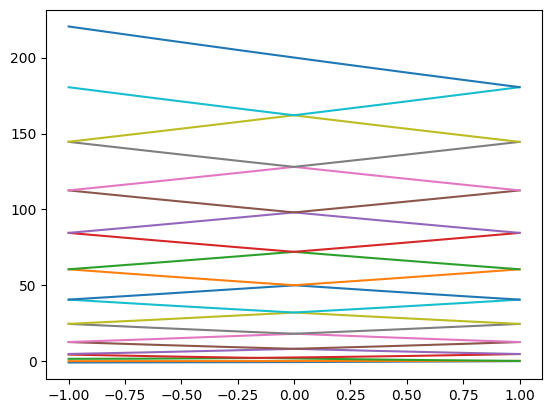

In [13]:
#Building a function which can solve the equation
def H_builder(alpha, N, q, hbar_scaled, k_l, m):
    E_r = (hbar_scaled**2)*(k_l**2)/(2*m)
    V_0 = alpha*E_r
    main_diag = np.zeros(dims)
    for i in range(-N,N):
        main_diag[i] = (((2*i+q)/hbar_scaled*k_l)**2*E_r)
    offset_diag = np.full(dims-1, V_0/4)
    H = np.zeros((dims,dims), dtype= float)
    np.fill_diagonal(H, main_diag)
    np.fill_diagonal(H[1:], offset_diag)
    np.fill_diagonal(H[:,1:], offset_diag)
    return H

q_vals = np.linspace(-hbar_scaled*k_l, hbar_scaled*k_l, 200)
energy_bands = np.zeros((len(q_vals), 2*N+1))

for i, q in enumerate(q_vals):
    H = H_builder(alpha, N, q, hbar_scaled, k_l, m)
    eigenvalues = np.linalg.eigh(H)[0]
    energy_bands[i, :] = eigenvalues  

print(energy_bands)
#Plotting the energy bands
for band in range(dims):
    plt.plot(q_vals, energy_bands[:, band], label=f'Band {band + 1}')


array([1.05457182e-34, 3.51523939e-35, 2.10914364e-35, 1.50653117e-35,
       1.17174646e-35, 9.58701652e-36, 8.11209090e-36])

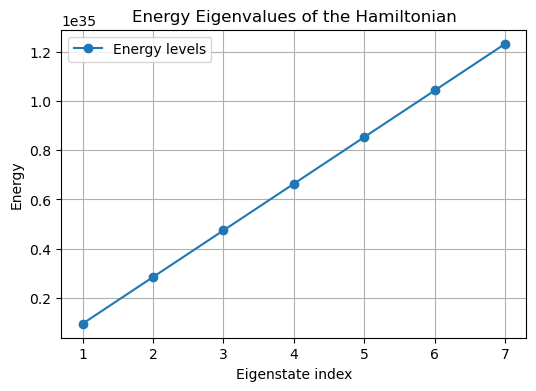

In [ ]:
#sanity check for eigenvectors - should we include an l dependence?
for i in range(num_states_to_plot):
    plt.plot(np.real(eigvecs[:, i]), label=f'Real part {i}')
    plt.plot(np.imag(eigvecs[:, i]), label=f'Imag part {i}')
    plt.title(f'Eigenvector {i} — Bloch candidate")
    plt.legend()
    plt.grid(True)
    plt.show()

SyntaxError: unterminated f-string literal (detected at line 5) (2323815666.py, line 5)

array([[ 9.48252156e+33, -8.34091289e-69,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -8.34091289e-69],
       [-8.34091289e-69,  2.84475647e+34, -8.34091289e-69,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00, -8.34091289e-69,  4.74126078e+34,
        -8.34091289e-69,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -8.34091289e-69,
         6.63776509e+34, -8.34091289e-69,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -8.34091289e-69,  8.53426941e+34, -8.34091289e-69,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -8.34091289e-69,  1.04307737e+35,
        -8.34091289e-69],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.2327278